In [1]:
import numpy as np
import pandas as pd
import argparse
import json
from datetime import datetime
from copy import deepcopy
import random
import os
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
plt.style.use('seaborn')
import seaborn as sns
import time
import sys
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import warnings
warnings.filterwarnings('ignore');

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

In [2]:
%load_ext autoreload
%autoreload 2
# from params import MEGLpParams
from utils.stat_utils import metric_analysis,slice_metric_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


INFO:rdkit:Enabling RDKit 2022.03.3 jupyter extensions


imported utils


In [3]:
DATA_ROOT=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\data\MEG'
clinical_file=os.path.join(DATA_ROOT,'MEG.clinical.csv')
clinical_df = pd.read_csv(clinical_file)

In [4]:
# ## let's just start with one directory..
# embedding_dir=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\pats_CogTr1\L3\HGCN_full_findc_id_dp'
# emb_stat_paths=[os.path.join(embedding_dir,f) for f in os.listdir(embedding_dir) if 'embedding_stats_' in f]
# if emb_stat_paths:
#     if len(emb_stat_paths)>1:
#         print('should only be one embedding path but so what')
#     print(os.path.exists(emb_stat_paths[0]))
#     print(emb_stat_paths[0])
#     stat_df=pd.read_csv(emb_stat_paths[0])
#     output_dir=os.path.join(embedding_dir,"outputs","stat_analysis")
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     plot_save_path=os.path.join(output_dir,'anova_plot')
#     df_save_path=os.path.join(output_dir,'anova_df')
#     title='RM ANOVA analysis'
    
#     slice_metric_df(stat_df,label_col='diagnosis',title=title,plot_save_path=plot_save_path,df_save_path=df_save_path)

In [5]:
def run_anova(emb_stats,output_dir,title='',label_col='diagnosis',cond_dict={}):
    """
    emb_stats either path or pandas dataframe
    """
#     embedding_dir=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\pats_CogTr1\L3\HGCN_full_findc_id_dp'
#     emb_stat_paths=[os.path.join(embedding_dir,f) for f in os.listdir(embedding_dir) if 'embedding_stats_' in f]
#     print(emb_stats,'STAT PATH')
#     if
    if type(emb_stats)==str:
        stat_df=pd.read_csv(emb_stats)
    else:
        stat_df=deepcopy(emb_stats)
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    plot_save_path=os.path.join(output_dir,'anova_plot'+title)
    df_save_path=os.path.join(output_dir,'anova_df'+title)
    if not title:
        title='RM ANOVA analysis'
    print(stat_df.shape,'STAT DICT BEFORE')
    stat_df_before=stat_df
    for condition,val in cond_dict.items():
        stat_df=stat_df[stat_df[condition]==val]
        title='{}_{}{}'.format(title,condition,val)
#         title=title+'_'+condition+'=='+val
#     print(cond_dict)
#     print(title)
    print(stat_df_before.shape,'BEFORE HAND')
    print(stat_df.shape,'STAT SHAPE AFTER COND')
    if not stat_df.shape[0]:
        print(stat_df_before,'WHAT HAPPENED TO EEVRYTHINGN')
    
#     assert False
#     return

    slice_metric_df(stat_df,label_col=label_col,title=title,plot_save_path=plot_save_path,df_save_path=df_save_path)

In [6]:
def run_anova_run_dir(run_dir,cond_dict={}):
    files=os.listdir(run_dir)
    outdir=os.path.join(run_dir,"outputs","stat_analysis")
    assert 'config.json' in files
    assert 'embeddings' in files
    embeddings_dir=os.path.join(run_dir,'embeddings')
    emb_stat_paths=[os.path.join(embeddings_dir,f) for f in os.listdir(embeddings_dir) if ('embedding_stats_' in f) and ('.csv' in f)]
    assert emb_stat_paths,'change this later, should be able to handle things that dont exist'
    if len(emb_stat_paths)>1:
        print('should only be one embedding path but so what')
    emb_stat_df=pd.read_csv(emb_stat_paths[0])
    
    with open(os.path.join(run_dir,'config.json')) as f:
        config=json.load(f)
        
    if config['train_only']:
        title='All Embeddings (train_only)'
        run_anova(emb_stat_df,output_dir=outdir,title=title,label_col='diagnosis',cond_dict=cond_dict)
    else:
        for group,members in config['idxs_dict'].items():
            member_set=set(members)
            emb_stat_df_sub=emb_stat_df[emb_stat_df['Scan Index'].isin(member_set)]
            title='{} Embeddings'.format(group)
            print(group)
            print(len(member_set),emb_stat_df_sub.shape,'member shapes')
            if len(member_set)<8:
                  print('too small to judge!')
                  continue
            run_anova(emb_stat_df_sub,output_dir=outdir,title=title,label_col='diagnosis',cond_dict=cond_dict)
    print(config)
    

(180, 154) STAT DICT BEFORE
(180, 154) BEFORE HAND
(92, 154) STAT SHAPE AFTER COND
(92, 154) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0     UMEC-002
1     UMEC-002
2     UMEC-020
3     UMEC-020
4     UMEC-022
        ...   
87    UMEC-206
88    UMEC-217
89    UMEC-217
90    UMEC-219
91    UMEC-219
Name: ID, Length: 92, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0C998DC8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0C998DC8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0C998DC8>
['pDMN_Coh', 'aDMN_Coh', 'DAN_Coh', 'FPN_Coh', 'VN_Coh', 'VAN_Coh', 'SN_Coh', 'SMN_Coh'] WC LABELS
rad
diagnosis label col
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

bout to show
SAVING
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\6\outputs\stat_analysis\anova_plotAll Embeddings (train_only)_R_time


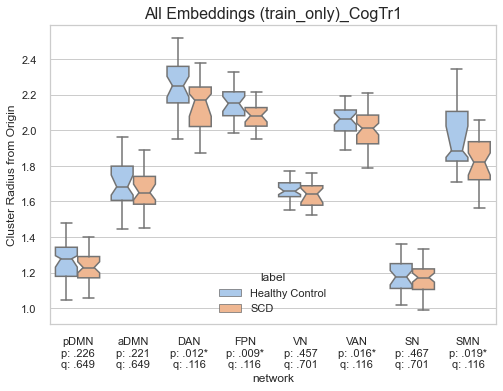

{'name': '2023_02_26_12_46_25_076878', 'task': 'ds', 'dataset': 'meg', 'use_pretrained': 0, 'save_dir': 'C:\\Users\\coleb\\OneDrive\\Desktop\\Fall 2021\\Neuro\\hyperBrain\\study\\meg\\ds\\all_pats\\L3\\HGCN_full_0.54c_plv_dp\\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\\6', 'save_id': '', 'save': 1, 'save_model': False, 'log_freq': 5, 'eval_freq': 2, 'local_rank': None, 'distributed_method': 'None', 'max_per_epoch': -1, 'split_seed': 1234, 'adj_threshold': 0.329, 'use_weight': True, 'is_inductive': 1, 'is_regression': 0, 'n_classes': 2, 'prop_idx': 0, 'use_virtual': 1, 'output_act': None, 'output_agg': True, 'output_dim': 3, 'use_weighted_loss': 1, 'band': 'alpha', 'metric': 'plv', 'use_ciplv': 0, 'use_plv': 1, 'use_identity': 0, 'use_beta': 0, 'use_degree': 0, 'use_region': 0, 'use_coords': 0, 'use_volume': 0, 'use_norm': 0, 'use_batch': 0, 'batch_size': 8, 'refresh_data': 1, 'raw_clinical_file': 'C:\\Users\\coleb\\OneDrive\\Desktop\\Fall 2021\\Neuro\\hyperBrain\\data/MEG/MEG.clinical.csv

In [11]:
# run_dir=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\study\meg\lp\alpha_plv_54c_dp\4'
# run_dir=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\lp\all_pats\L3\HGCN_full_0.54c_plv_dp\e100_p10_lr0.021_vpct0.3_tpct0.2_stretch98_b8\0'
# run_dir=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_id_dp\0'
run_dir=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\6'
cond_dict={'CogTr':1}
run_anova_run_dir(run_dir,cond_dict)

In [8]:
def run_anova_all_in_subtree(root,insist_substrs=[],cond_dict={}):
    for (subroot,dirs,files) in os.walk(root, topdown=True):
        
        if not insist_substrs:
            keep=True
        else:
            keep=False
            for s in insist_substrs:
                if s in subroot:
                    keep=True
        if not keep:
            continue
        print()
        emb_stat_paths=[os.path.join(subroot,f) for f in files if ('embedding_stats_' in f) and ('.csv' in f)]    
        if not emb_stat_paths:
            continue
#         print(subroot,'SUBROOT')
#         continue
        if len(emb_stat_paths)>1:
            print('should only be one embedding path but so what')
        for emb_path in emb_stat_paths:
            if 'average' in emb_path:
                file=os.path.basename(emb_path)
#                 print(emb_path)
                splits=file.split('_')
                print(splits)
                avg_indx=splits.index('average')
                title= 'Average of {} embeddings'.format(splits[avg_indx+1])
            else:
                title=''
            print(emb_path,'embeds')
            print(title,'title')
            outdir=os.path.join(subroot,"outputs","stat_analysis")
            run_anova(emb_path,output_dir=outdir,title=title,label_col='diagnosis',cond_dict=cond_dict)



['average', '2', 'embedding', 'stats', 'Functional Net', 'PCTt0.29.csv']
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\logs\meg\lp\2023_2_27\average_2_embedding_stats_Functional Net_PCTt0.29.csv embeds
Average of 2 embeddings title
(180, 155) STAT DICT BEFORE
(180, 155) BEFORE HAND
(92, 155) STAT SHAPE AFTER COND
(92, 155) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0     UMEC-002
1     UMEC-002
2     UMEC-020
3     UMEC-020
4     UMEC-022
        ...   
87    UMEC-206
88    UMEC-217
89    UMEC-217
90    UMEC-219
91    UMEC-219
Name: ID, Length: 92, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0AA282C8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0AA282C8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0AA282C8>
['pDMN_Coh', 'aD

bout to show
SAVING
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\logs\meg\lp\2023_2_27\outputs\stat_analysis\anova_plotAverage of 2 embeddings_R_time


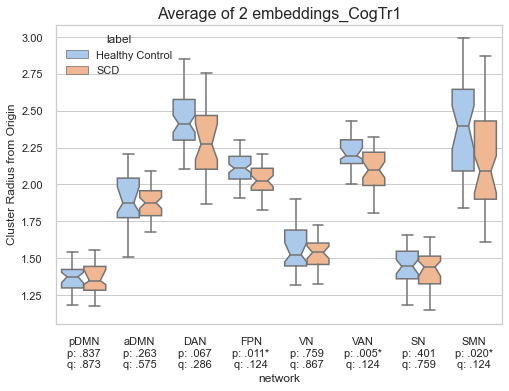



C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\logs\meg\lp\2023_2_27\1\embeddings\embedding_stats_Functional Net_PCTt0.29.csv embeds
 title
(180, 154) STAT DICT BEFORE
(180, 154) BEFORE HAND
(92, 154) STAT SHAPE AFTER COND
(92, 154) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0     UMEC-002
1     UMEC-002
2     UMEC-020
3     UMEC-020
4     UMEC-022
        ...   
87    UMEC-206
88    UMEC-217
89    UMEC-217
90    UMEC-219
91    UMEC-219
Name: ID, Length: 92, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0AA992C8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0AA992C8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0AA992C8>
['pDMN_Coh', 'aDMN_Coh', 'DAN_Coh', 'FPN_Coh', 'VN_Coh', 'VAN_Coh', 'SN_Coh', 'SMN_Coh'] WC LABELS
rad
diagn

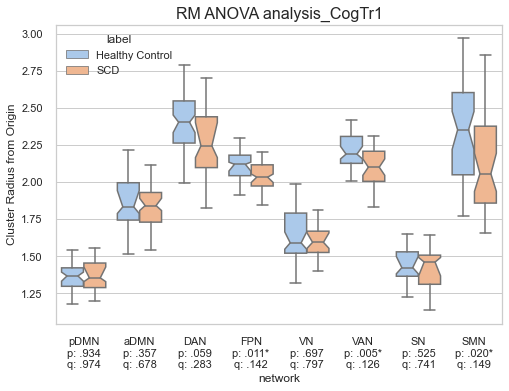





C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\logs\meg\lp\2023_2_27\2\embeddings\embedding_stats_Functional Net_PCTt0.29.csv embeds
 title
(180, 154) STAT DICT BEFORE
(180, 154) BEFORE HAND
(92, 154) STAT SHAPE AFTER COND
(92, 154) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0     UMEC-002
1     UMEC-002
2     UMEC-020
3     UMEC-020
4     UMEC-022
        ...   
87    UMEC-206
88    UMEC-217
89    UMEC-217
90    UMEC-219
91    UMEC-219
Name: ID, Length: 92, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0C998F48>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0C998F48>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0C998F48>
['pDMN_Coh', 'aDMN_Coh', 'DAN_Coh', 'FPN_Coh', 'VN_Coh', 'VAN_Coh', 'SN_Coh', 'SMN_Coh'] WC LABELS
rad
dia

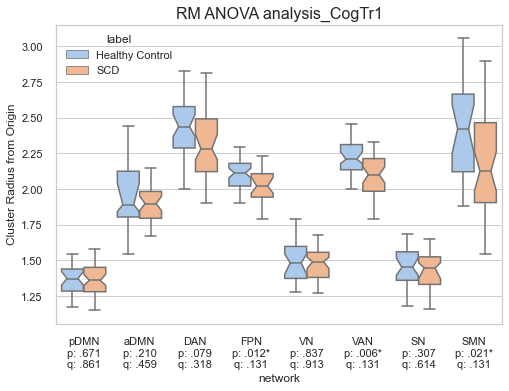

In [23]:
cond_dict={'CogTr':1}

# run_anova_all_in_subtree(r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp',cond_dict=cond_dict)
# run_anova_all_in_subtree(r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3',['e20'],cond_dict)
root=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\pats_CogTr1\L3\HGCN_full_0.54c_plv_dp\e5_p6_lr0.021_vpct0_tpct0_stretch98_b8'
root=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\pats_CogTr1\L3\HGCN_full_0.54c_id_dp'
# root=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\pats_CogTr1\L3'
root=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hgcn\logs\meg\lp\2023_2_27'
run_anova_all_in_subtree(root,cond_dict=cond_dict)


['average', '2', 'embedding', 'stats', 'Functional Net', 'PCTt0.29.csv']
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\average_2_embedding_stats_Functional Net_PCTt0.29.csv embeds
Average of 2 embeddings title
(180, 155) STAT DICT BEFORE
(180, 155) BEFORE HAND
(92, 155) STAT SHAPE AFTER COND
(92, 155) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0     UMEC-002
1     UMEC-002
2     UMEC-020
3     UMEC-020
4     UMEC-022
        ...   
87    UMEC-206
88    UMEC-217
89    UMEC-217
90    UMEC-219
91    UMEC-219
Name: ID, Length: 92, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0BB9B3C8>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0BB9B3C8>
<generator object d

bout to show
SAVING
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\outputs\stat_analysis\anova_plotAverage of 2 embeddings_R_time


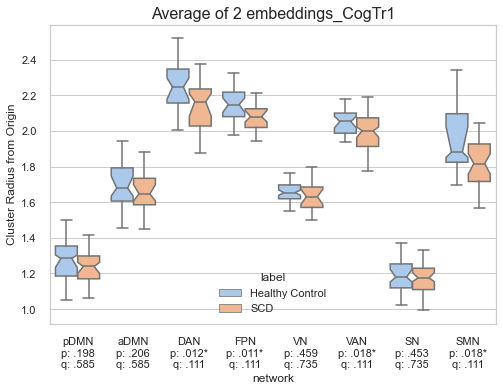









C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\5\embeddings\embedding_stats_Functional Net_PCTt0.29.csv embeds
 title
(180, 154) STAT DICT BEFORE
(180, 154) BEFORE HAND
(92, 154) STAT SHAPE AFTER COND
(92, 154) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0     UMEC-002
1     UMEC-002
2     UMEC-020
3     UMEC-020
4     UMEC-022
        ...   
87    UMEC-206
88    UMEC-217
89    UMEC-217
90    UMEC-219
91    UMEC-219
Name: ID, Length: 92, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0BB9B748>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0BB9B748>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0BB9B748>
['pDMN_Coh', 'aDMN_Coh', 'DAN_

bout to show
SAVING
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\5\embeddings\outputs\stat_analysis\anova_plot_R_time


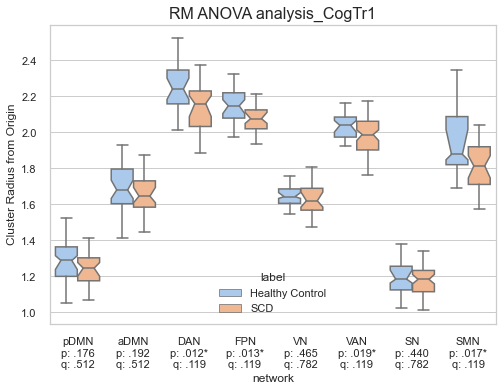



C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\6\embeddings\embedding_stats_Functional Net_PCTt0.29.csv embeds
 title
(180, 154) STAT DICT BEFORE
(180, 154) BEFORE HAND
(92, 154) STAT SHAPE AFTER COND
(92, 154) CONDITIONAL DF
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] SCAN LABELS
0     UMEC-002
1     UMEC-002
2     UMEC-020
3     UMEC-020
4     UMEC-022
        ...   
87    UMEC-206
88    UMEC-217
89    UMEC-217
90    UMEC-219
91    UMEC-219
Name: ID, Length: 92, dtype: object ID LABELS
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0BB9B748>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0BB9B748>
<generator object digest_stat_df.<locals>.<genexpr> at 0x000001AF0BB9B748>
['pDMN_Coh', 'aDMN_Coh', 'DAN_Coh', 

bout to show
SAVING
C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\6\embeddings\outputs\stat_analysis\anova_plot_R_time


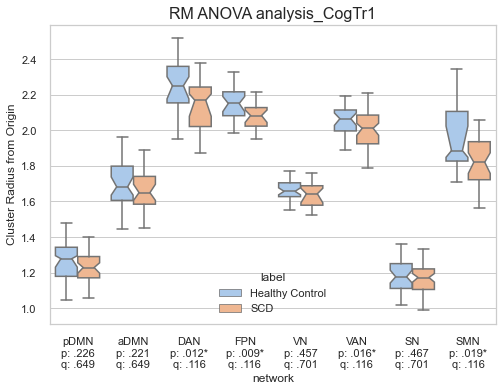

In [9]:
# root=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\lp\all_pats\L3\HGCN_full_0.54c_plv_dp\e100_p10_lr0.021_vpct0.3_tpct0.2_stretch98_b8'
# root='C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\lp\all_pats\L3'
cond_dict={'CogTr':1}
root=r'C:\Users\coleb\OneDrive\Desktop\Fall 2021\Neuro\hyperBrain\study\meg\ds\all_pats\L3\HGCN_full_0.54c_plv_dp\e60_p6_lr0.021_vpct0_tpct0_stretch98_b8\6'
root=r'
run_anova_all_in_subtree(root,cond_dict=cond_dict)